# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [8]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [9]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터 (독립 변수 - 원인)
y = dataset.iloc[:, -1].values # 마지막 컬럼 데이터 (종속 변수 - 결과)

In [10]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 학습 (모델 생성)

LinearRegression()

In [14]:
y_pred = reg.predict(X) # X 에 대한 예측 값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

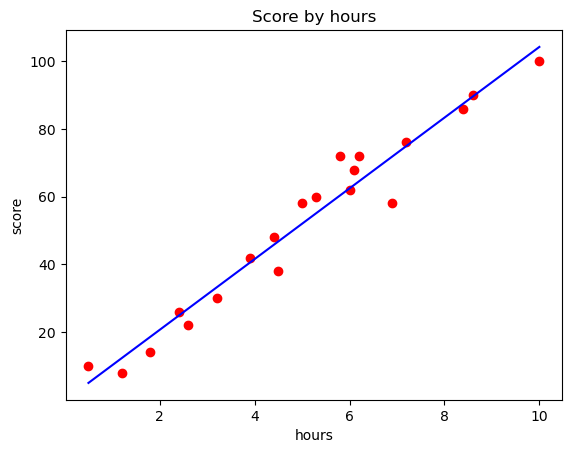

In [22]:
plt.scatter(X, y, color='red') # 산정도
plt.plot(X, y_pred, color='blue') # 선 그래프
plt.title('Score by hours') # 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [26]:
print('9시간 공부했을 때 예상 점수 : ', reg.predict([[9], [8], [7]])) # 9,8,7 시간일때 예측 값

9시간 공부했을 때 예상 점수 :  [93.77478776 83.33109082 72.88739388]


In [27]:
reg.coef_ # 기울기 (m)

array([10.44369694])

In [28]:
reg.intercept_ # y 절편 (b)

-0.21848470286721522


y = mx + b -> y = 10.4436x - 0.2184